# Exercises from Linear Algebra for DS

In [32]:
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.io as pio
import scipy

pio.renderers.default='iframe'
#plt.figure(figsize=(12, 12), dpi=80)
plt.rcParams["figure.figsize"] = (7,7)

In [2]:
#function to create nd vectors in (0, 10, 0, 10)
def vec(dim=2):
    return np.random.rand(dim)*10

# function to create row-vectors
def row(dim=2):
    return np.array([vec(dim=2)])

## Chapter 4

### Exercise 4.1

In [31]:
# Define pearson and cosine correlation

def pearson(x, y):
    # Claculate pearson correlation. Vectors should be 1d arrays
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    
    return np.dot(x - x_mean, y - y_mean) / (np.linalg.norm(x - x_mean) * np.linalg.norm(y - y_mean))

def cosine(x,y):
    return np.dot(x,y) / (np.linalg.norm(x) * np.linalg.norm(y))

In [33]:
# test Pearson

x = vec(5)
y = vec(5)

np.corrcoef(x,y)[0,1] - pearson(x,y) < 1e-10 # most likely true

True

In [46]:
# Test cosine

x = vec(5)
y = vec(5)

cosine(x-np.mean(x), y-np.mean(y)), pearson(x,y)

(-0.7252979499281621, -0.7252979499281621)

### Exercise 4.2

Difference between corr coef and cosine similarity

In [52]:
x = np.array([0,1,2,3])


points = np.array([[cosine(x, x+i), pearson(x, x+i)] for i in np.arange(-50, 50)])

<AxesSubplot:>

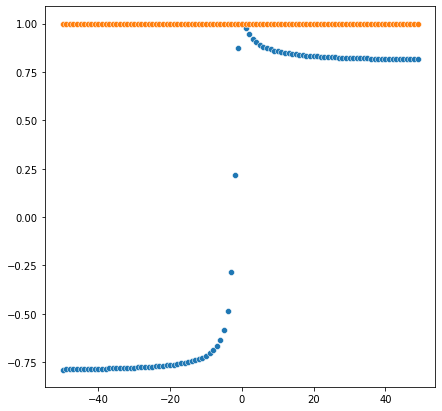

In [57]:
sns.scatterplot(x=np.arange(-50, 50), y=points[:,0], markers=True)
sns.scatterplot(x=np.arange(-50, 50), y=points[:,1], markers=True)

### Exercise 4.5

Detect changes

In [61]:
kern = np.array([-1,1])

data = np.array([1 for x in range(10)] + [10 for x in range(10)] + [1 for x in range(10)])

In [62]:
data

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [66]:
signal = []

for x in np.arange(len(data)-1):
    signal.append(np.dot(data[x:x+2], kern))

<AxesSubplot:>

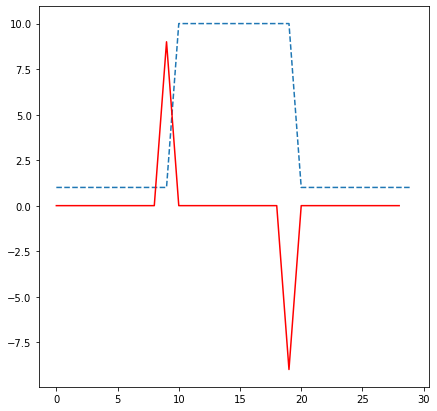

In [72]:
sns.lineplot(x=np.arange(len(data)), y=data, ls='--')
sns.lineplot(x=np.arange(len(data)-1), y=signal, color='red')


In [80]:
kern_2 = np.array([0, -1, 1, 0])
kern_3 = np.array([1, -1])
kern_4 = np.array([-1, 2])

signal_2 = []

for x in np.arange(len(data)-4):
    signal_2.append(np.dot(data[x:x+4], kern_2))
    
signal_3 = []

for x in np.arange(len(data)-1):
    signal_3.append(np.dot(data[x:x+2], kern_3))
    
signal_4 = []

for x in np.arange(len(data)-1):
    signal_4.append(np.dot(data[x:x+2], kern_4))

<AxesSubplot:>

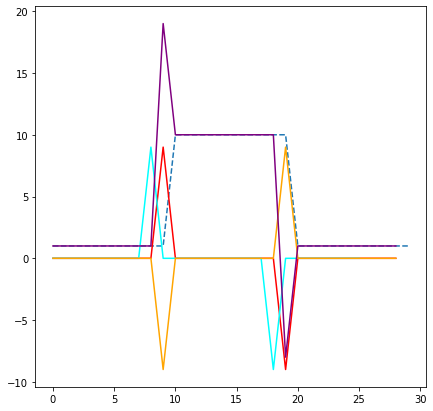

In [82]:
sns.lineplot(x=np.arange(len(data)), y=data, ls='--')
sns.lineplot(x=np.arange(len(data)-1), y=signal, color='red')

sns.lineplot(x=np.arange(len(data)-4), y=signal_2, color='cyan')
sns.lineplot(x=np.arange(len(data)-1), y=signal_3, color='orange')
sns.lineplot(x=np.arange(len(data)-1), y=signal_4, color='purple')

### Exercise 4.6

Similar to 4.5 but with normal distribution

In [92]:
data = np.random.randn(100)

kern = np.array([0, .1, .3, .8, .3, .1, 0])
kern = kern / sum(kern)

In [95]:
signal = []

for x in np.arange(len(data)-7):
    signal.append(np.dot(data[x:x+7], kern))

<AxesSubplot:>

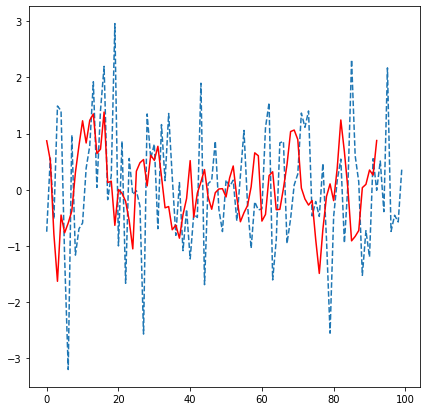

In [101]:
sns.lineplot(x=np.arange(100), y=data, ls='--')
sns.lineplot(x=np.arange(93), y=signal, color='red')

### Exercise 4.7

with kernel centre = -1

In [102]:
kern = np.array([0, .1, .3, -1, .3, .1, 0])
kern = kern / sum(kern)

In [103]:
signal = []

for x in np.arange(len(data)-7):
    signal.append(np.dot(data[x:x+7], kern))

<AxesSubplot:>

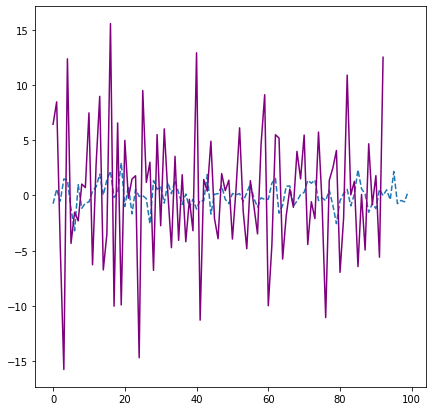

In [104]:
sns.lineplot(x=np.arange(100), y=data, ls='--')
sns.lineplot(x=np.arange(93), y=signal, color='purple')